In [1]:
import random, math, pylab

In [205]:
x, y, z = 0.0, 0.0, 0.0
alpha = 0.1
n_trials = 20000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-alpha, alpha), random.uniform(-alpha, alpha)
    if (x + del_x)**2+(y + del_y)**2 < 1.0:
        x, y = x + del_x, y + del_y
    
    z = random.uniform(-1.0,1.0)
    if x**2 + y**2 + z**2 < 1.0: n_hits += 1
        
print (2.0 * n_hits / float(n_trials))


1.337


In [228]:
x, y, z, alpha= 0.0, 0.0, 0.0, 0.0
delta = 0.1
n_trials = 20000
n_hits = 0
for i in range(n_trials):
    del_x, del_y, del_z = random.uniform(-delta, delta), random.uniform(-delta, delta), random.uniform(-delta, delta)
    if (x + del_x)**2+(y + del_y)**2+(z + del_z)**2 < 1.0:
        x, y, z = x + del_x, y + del_y, z + del_z
    
    alpha = random.uniform(-1.0,1.0)
    if x**2 + y**2 + z**2 + alpha**2 < 1.0: n_hits += 1
        
print (2.0 * n_hits / float(n_trials))

1.1632


[0.16364147187585304, -0.032011717606424864, -0.2678298788904484, 0.3162471500880525, -0.24157812528074454, 0.0763466004380351, -0.05932757893883965, 0.2768329633770819, -0.08463237144863135, -0.06169579937096241, 0.26107848038834114, 0.2911871594864025, 0.5136105941017536, -0.028843294145432456, -0.0075574057491459845, -0.11653927263116853, -0.10124410884520746, 0.3086730215887608, -0.09669644757343271, -0.2559840869077256]


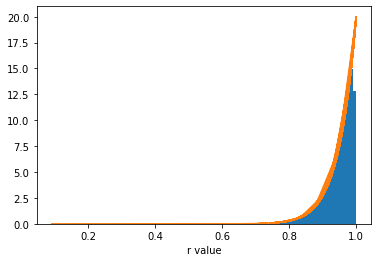

In [41]:
def P(r,d):
    P=[]
    for k in range(len(r)):
        P.append(d*r[k]**(d-1))
    return P
def markov(d):
    x=[0.0]*d
    delta = 0.1
    n_trials = 20000
    n_hits = 0
    old_radius_square = 0.0
    r=[]
    for i in range (n_trials):
        k = random.randint(0, d - 1)
        x_old_k = x[k]
        x_new_k = x_old_k + random.uniform(-delta, delta)
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        if new_radius_square < 1.0:
            x[k]=x_new_k
            old_radius_square = new_radius_square
            r.append(math.sqrt(old_radius_square))
            n_hits+=1
    pylab.hist(r,density=True,bins=100,label='r histogram')
    pylab.plot(r,P(r,d),label='P plot')
    pylab.xlabel('r value')
    pylab.show
    pylab.savefig('r histogram and P plot-20.png')
    return(x)

print(markov(20))


In [367]:
def qcomp(d):
    x=[0.0]*d
    delta = 0.1
    n_trials = 1000000
    n_hits = 0
    old_radius_square = 0.0
    r=[]
    for i in range (n_trials):
        k = random.randint(0, d - 2)
        x_old_k = x[k]
        x_new_k = x_old_k + random.uniform(-delta, delta)
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        if new_radius_square < 1.0:
            x[k]=x_new_k
            old_radius_square = new_radius_square
        x[d-1]=random.uniform(-1.0,1.0)
        if old_radius_square + x[d-1]**2 < 1.0: n_hits+=1
    return(2*n_hits/float(n_trials))

print(qcomp(4))


1.17099


In [29]:
def vcomp(d):
    delta = 0.1
    n_trials = 100000
    V=2
    r=1
    if d != 1:
        for t in range (2,d+1):
            x=[0.0]*t
            old_radius_square = 0.0
            n_hits = 0
            for i in range (n_trials):
                k = random.randint(0, t - 2)
                x_old_k = x[k]
                x_new_k = x_old_k + random.uniform(-delta, delta)
                new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
                if new_radius_square < 1.0:
                    x[k]=x_new_k
                    old_radius_square = new_radius_square
                    if t==d: r=old_radius_square
                x[t-1]=random.uniform(-1.0,1.0)
                if old_radius_square + x[t-1]**2 < 1.0: n_hits+=1
            Q=2*n_hits/float(n_trials)
            V*=Q
    return(V,r)

In [30]:
volume=[]
radius=[]
for i in range(1,201):
    k=vcomp(i)
    volume.append(k[0])
    radius.append(k[1])
    print(i,k)

1 (2, 1)
2 (3.12184, 0.9230409167547805)
3 (4.168680300799999, 0.46872187694486844)
4 (4.9879107165888, 0.9443166609085825)
5 (5.52867668183094, 0.6306479853722611)
6 (5.0528274192875395, 0.32007480220292117)
7 (4.796790769794086, 0.664392376193041)
8 (3.8970708206069538, 0.9437898890130823)
9 (3.324295870854592, 0.7917426014293742)
10 (2.515552864068586, 0.9547633852070434)
11 (1.8797531601455333, 0.7247479789218119)
12 (1.2591239830041379, 0.9173815509437436)
13 (0.908167356418324, 0.8288764482104233)
14 (0.5930534370602375, 0.9266914946523273)
15 (0.41424377440288845, 0.9787960413728889)
16 (0.27454586561307415, 0.6104274730708534)
17 (0.15768565734482728, 0.9748202630040407)
18 (0.09139909328315689, 0.8266449026696286)
19 (0.04816620279490654, 0.741573554668227)
20 (0.02601143362371158, 0.9806688793143425)
21 (0.01351686031684476, 0.8709469634293543)
22 (0.008127890081188556, 0.9869487703405417)
23 (0.003714752620489465, 0.9688645463153212)
24 (0.002063388858926609, 0.9919824972233

176 (2.110880572299553e-90, 0.9776478614996628)
177 (5.061191326280478e-91, 0.9917221431737397)
178 (9.820419261055372e-92, 0.9869586588615133)
179 (2.317822577899056e-92, 0.9903563900756103)
180 (2.9011188585078756e-93, 0.991338808929789)
181 (5.295643054132187e-94, 0.9830902016374528)
182 (1.0915161895307767e-94, 0.9937200852596502)
183 (2.2059968666592257e-95, 0.9999584269301399)
184 (3.5754519937217986e-96, 0.9929102843140214)
185 (6.684579687456264e-97, 0.9900641969150685)
186 (8.289844814210543e-98, 0.9765376867404357)
187 (2.624551484652983e-98, 0.9842023208450927)
188 (4.380763270909844e-99, 0.9904177223255486)
189 (7.881406380667573e-100, 0.9981745886496374)
190 (1.5594973974562176e-100, 0.9859308016745048)
191 (3.905756061357376e-101, 0.9925623927427288)
192 (6.437794704418212e-102, 0.9985211130255917)
193 (8.585625620626167e-103, 0.9921294097115376)
194 (1.7693072988097534e-103, 0.9957907517578887)
195 (3.7886108296168235e-104, 0.9977534082908853)
196 (6.3077081655167045e-10

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

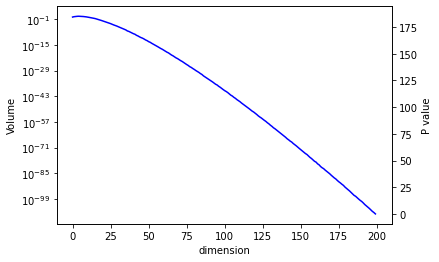

In [42]:
fig,ax = pylab.subplots()
ax.plot(volume,'-',label='Volume',color='b')
ax.set_xlabel('dimension')
ax.set_ylabel('Volume')
ax.set_yscale('log')
ax2=ax.twinx()
for i in range(1,201):
  ax2.plot(i,i*(radius[i-1]**(i-1)),'-', label='P value',color='orange')
ax2.set_ylabel('P value')
ax2.set_xlabel('dimension')
fig.savefig('V volume and P analytic function in d dimensions.png')
fig.show

In [32]:
def vcomp2(d,n_trials):
    delta = 0.1
    V=2
    if d != 1:
        for t in range (2,d+1):
            x=[0.0]*t
            old_radius_square = 0.0
            n_hits = 0
            for i in range (n_trials):
                k = random.randint(0, t - 2)
                x_old_k = x[k]
                x_new_k = x_old_k + random.uniform(-delta, delta)
                new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
                if new_radius_square < 1.0:
                    x[k]=x_new_k
                    old_radius_square = new_radius_square
                x[t-1]=random.uniform(-1.0,1.0)
                if old_radius_square + x[t-1]**2 < 1.0: n_hits+=1
            Q=2*n_hits/float(n_trials)
            V*=Q
    return(V)

In [36]:
n_trials=[10,10**2,10**3,10**4,10**5,10**6,10**7]
n_runs=5
d=20
Vexact=(math.pi**(10))/368800
print('n_trials | <V_sph(20)> |  V_sph(20) (exact) | error | difference')
for i in range (len(n_trials)):
  aveV=[]
  aveV2=[]
  for k in range(n_runs):
    V=vcomp2(d,n_trials[i])
    aveV.append(V)
    aveV2.append(V**2)
  Vave=sum(aveV)/float(n_runs)
  Vave2=sum(aveV2)/float(n_runs)
  err=math.sqrt((Vave2-Vave**2)/float(n_runs))
  dif=Vave/Vexact
  print(n_trials[i] ,"|", Vave, "|", Vexact,"|", err, "|", dif)

n_trials | <V_sph(20)> |  V_sph(20) (exact) | error | difference
10 | 858804.7155200001 | 0.25392637601974777 | 57063.89051217994 | 3382101.25699274
100 | 186253.91809893545 | 0.25392637601974777 | 23265.227961977107 | 733495.7518727812
1000 | 2.783342016339497 | 0.25392637601974777 | 0.5619512789948421 | 10.961216632820522
10000 | 0.053100095231763254 | 0.25392637601974777 | 0.004179980772373817 | 0.20911610705472233
100000 | 0.026186489119120755 | 0.25392637601974777 | 0.00035107238222624877 | 0.10312630585916069
1000000 | 0.025694761482215084 | 0.25392637601974777 | 0.00018963137739026634 | 0.10118980897130911
10000000 | 0.02591426966618981 | 0.25392637601974777 | 6.700064912581595e-05 | 0.1020542649896853


In [ ]:
import math, random
def qcomp(d,n_trials):
    x=[0.0]*d
    delta = 0.1
    n_runs = 10
    old_radius_square = 0.0
    aveQ=[]
    for k in range(n_runs):
      n_hits = 0
      for i in range (n_trials):
          k = random.randint(0, d - 2)
          x_old_k = x[k]
          x_new_k = x_old_k + random.uniform(-delta, delta)
          new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
          if new_radius_square < 1.0:
              x[k]=x_new_k
              old_radius_square = new_radius_square
          x[d-1]=random.uniform(-1.0,1.0)
          if old_radius_square + x[d-1]**2 < 1.0: n_hits+=1
      aveQ.append(2*n_hits/float(n_trials))
    Qave=sum(aveQ)/float(n_runs)
    return(Qave)

def vcomp(d,n_trials):
    V=2
    if d != 1:
        for t in range (2,d+1):
            Q=qcomp(t,n_trials)
            V*=Q
    return(V)

n_trials=[10,10**2,10**3,10**4,10**5,10**6,10**7]
n_runs=2
d=20
Vexact=(math.pi**(10))/3628800
print('n_trials | <V_sph(20)> |  V_sph(20) (exact) | error | difference')

for i in range (len(n_trials)):
  aveV=[]
  aveV2=[]
  for k in range(n_runs):
    V=vcomp(d,n_trials[i])
    aveV.append(V)
    aveV2.append(V**2)
  Vave=sum(aveV)/float(n_runs)
  Vave2=sum(aveV2)/float(n_runs)
  err=math.sqrt((Vave2-Vave**2)/float(n_runs))
  dif=Vave/Vexact
  print(n_trials[i] ,"|", Vave, "|", Vexact,"|", err, "|", dif)

In [43]:
0.02571688993810195/0.02580689139001405

0.9965125031701056